In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv("/content/BostonHousing.csv")

In [3]:
print(raw_df.info())
print(raw_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6

In [4]:
dataset= raw_df.copy()

In [5]:
dataset_stats = dataset.describe()
dataset_stats.pop("MEDV")
dataset_stats = dataset_stats.transpose()

label_data= dataset.pop('MEDV')

In [11]:
def min_max_norm(x):
  return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

normed_train_data = min_max_norm(dataset)

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=13, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 42,497
Trainable params: 42,497
Non-trainable params: 0
_________________________________________________________________


In [14]:
optimizer= tf.keras.optimizers.SGD(learning_rate=0.04)
loss= tf.keras.losses.mean_absolute_error
metrics= tf.keras.metrics.RootMeanSquaredError()

model.compile(loss =loss, optimizer= optimizer, metrics=[metrics])

In [16]:
result=model.fit(normed_train_data, label_data, epochs=2000, batch_size=100)

Epoch 1/2000
6/6 [==============================] - 1s 3ms/step - loss: 16.2946 - root_mean_squared_error: 19.1116
Epoch 2/2000
6/6 [==============================] - 0s 3ms/step - loss: 7.1635 - root_mean_squared_error: 10.0282
Epoch 3/2000
6/6 [==============================] - 0s 3ms/step - loss: 6.5589 - root_mean_squared_error: 9.2506
Epoch 4/2000
6/6 [==============================] - 0s 3ms/step - loss: 6.5821 - root_mean_squared_error: 9.2450
Epoch 5/2000
6/6 [==============================] - 0s 2ms/step - loss: 6.5410 - root_mean_squared_error: 9.2905
Epoch 6/2000
6/6 [==============================] - 0s 2ms/step - loss: 6.5427 - root_mean_squared_error: 9.2766
Epoch 7/2000
6/6 [==============================] - 0s 2ms/step - loss: 6.5940 - root_mean_squared_error: 9.4661
Epoch 8/2000
6/6 [==============================] - 0s 2ms/step - loss: 6.5330 - root_mean_squared_error: 9.2769
Epoch 9/2000
6/6 [==============================] - 0s 4ms/step - loss: 6.5568 - root_mean_sq

In [17]:
print(result.history.keys())

dict_keys(['loss', 'root_mean_squared_error'])


16/16 [==============================] - 0s 1ms/step - loss: 2.6052 - root_mean_squared_error: 4.3216

 Test rmse: 4.3216


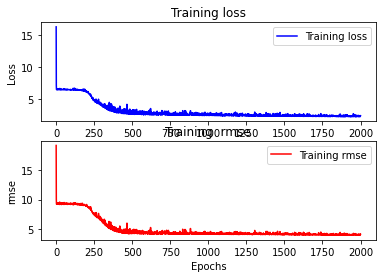

In [18]:
### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 root_mean_squared_error 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'r-', label='Training rmse')
plt.title('Training  rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(normed_train_data, label_data)[1]))

plt.show()